### Objective
* Data Analysis
* Building Model for Prediction
* Hyper-Parameter Tunning
* Deployment Basics


### Adding Some important libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Credit card data

In [11]:
data = pd.read_excel('default of credit card clients.xls')

In [12]:
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [13]:
columns = list(data.loc[0].values)

In [14]:
data = data[1:]

In [15]:
data.columns = columns 

In [16]:
data.index = data.ID 

In [17]:
data.drop(columns=['ID'],inplace=True)

In [18]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [19]:
data.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
18120,100000,1,2,2,35,0,0,0,0,0,...,88037,59213,56651,3558,3803,3146,2514,3000,2500,0
12091,50000,1,2,2,30,1,2,0,0,0,...,48371,56294,61259,0,2500,2271,50000,10100,3000,0
1009,30000,1,2,2,34,0,0,4,3,2,...,23289,22779,51224,5500,0,0,0,3400,512,0
12642,140000,2,2,2,24,1,-2,-1,-1,2,...,80644,146651,55776,0,167,80677,0,2500,28,0
12269,110000,2,2,2,25,2,0,0,0,0,...,75808,78490,81238,6000,4380,3000,5000,10000,3000,1
22413,50000,2,2,1,35,0,0,0,0,0,...,28340,24384,22643,2000,2000,2000,2000,1000,1000,0
12122,40000,1,2,2,27,6,5,4,3,2,...,38797,38244,38478,0,0,0,0,871,116,1
6328,20000,2,2,2,22,2,2,2,2,0,...,7835,8605,10948,2000,900,0,900,2500,0,1
21785,320000,2,3,2,25,0,0,0,0,0,...,69746,70040,71076,3084,3007,3031,2367,2450,2432,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null object
SEX                           30000 non-null object
EDUCATION                     30000 non-null object
MARRIAGE                      30000 non-null object
AGE                           30000 non-null object
PAY_0                         30000 non-null object
PAY_2                         30000 non-null object
PAY_3                         30000 non-null object
PAY_4                         30000 non-null object
PAY_5                         30000 non-null object
PAY_6                         30000 non-null object
BILL_AMT1                     30000 non-null object
BILL_AMT2                     30000 non-null object
BILL_AMT3                     30000 non-null object
BILL_AMT4                     30000 non-null object
BILL_AMT5                     30000 non-null object
BILL_AMT6                     30000 non-null object
PAY_AMT

### Prediction Objective
* We want to preduct from this data if a person will deafult next month or not.


In [21]:
data.rename(columns={'default payment next month': 'def_next_month'},inplace=True)

In [22]:
data.sample(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_next_month
ID,,,,,,,,,,,,,,,,,,,,,
10515,240000,2,2,1,35,0,0,0,0,2,...,114584,115681,112528,5500,5400,8000,4179,0,4000,0
2697,20000,2,3,2,40,-1,-1,0,0,0,...,9625,12625,0,894,5000,4000,3000,0,0,0
27266,180000,1,2,1,49,-2,-2,-2,-2,-2,...,0,45,0,0,0,0,45,0,2380,0
16056,200000,2,3,1,46,-1,0,0,0,0,...,124282,118956,121449,5216,8000,20000,15653,3793,10000,0
18862,100000,2,2,2,27,0,0,2,0,0,...,24794,26067,28630,4000,0,1794,2000,3000,1200,0


In [23]:
data.def_next_month.value_counts()

0    23364
1     6636
Name: def_next_month, dtype: int64

### Observation about tarfet column
* The data contains imbalanced classes

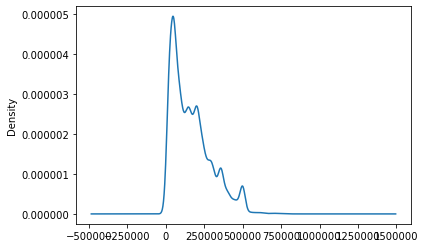

In [24]:
data.LIMIT_BAL.plot.kde()

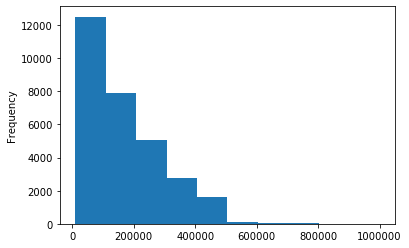

In [25]:
data.LIMIT_BAL.plot.hist()

In [26]:
data.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

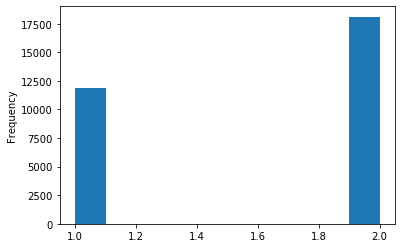

In [27]:
data.SEX.plot.hist()

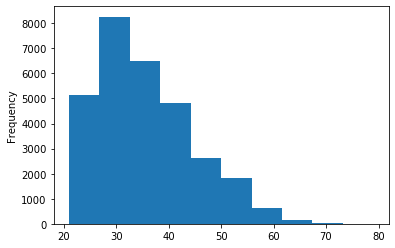

In [28]:
data.AGE.plot.hist()

In [29]:
payment_status = data.filter(regex='PAY_\d')

In [30]:
payment_status.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

### Bucketizing data
#### IN columns PAY_0..5 0/-1/-2 reprsents payments done
* Putting them all in same bucket, marking them 0. Since they paid
* -2,-1 means paid in advance

In [31]:
cols = list(payment_status.columns)

In [32]:
for col in cols:
    data[col] = data[col].map(lambda v: 0 if v < 0 else v)

In [33]:
data.sample(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_next_month
ID,,,,,,,,,,,,,,,,,,,,,
25912,50000,2,1,2,34,0,0,0,0,0,...,3682,3190,2451,1077,5693,4255,3190,2451,4425,0
8649,180000,1,1,1,37,0,0,0,0,0,...,123916,125661,127458,4406,4397,4405,4711,5040,4571,0
14631,10000,1,2,2,23,3,2,2,2,2,...,10227,9933,9884,0,1600,500,0,1000,0,1
6470,200000,1,1,2,34,0,0,0,0,0,...,605,-5,-5,452,0,606,0,0,0,0
17986,230000,1,1,1,33,0,0,0,0,0,...,227528,121751,219354,9285,12000,9100,4600,4200,4100,1


#### Data Preprocessing
* Type_cast all data in int64

In [34]:
for col in data.columns:
    data[col] = data[col].astype('int64')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null int64
EDUCATION         30000 non-null int64
MARRIAGE          30000 non-null int64
AGE               30000 non-null int64
PAY_0             30000 non-null int64
PAY_2             30000 non-null int64
PAY_3             30000 non-null int64
PAY_4             30000 non-null int64
PAY_5             30000 non-null int64
PAY_6             30000 non-null int64
BILL_AMT1         30000 non-null int64
BILL_AMT2         30000 non-null int64
BILL_AMT3         30000 non-null int64
BILL_AMT4         30000 non-null int64
BILL_AMT5         30000 non-null int64
BILL_AMT6         30000 non-null int64
PAY_AMT1          30000 non-null int64
PAY_AMT2          30000 non-null int64
PAY_AMT3          30000 non-null int64
PAY_AMT4          30000 non-null int64
PAY_AMT5          30000 non-null int64
PAY_AMT6          30000 non-null 

### Baselining Model

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
trainX, testX, trainY, testY = train_test_split(data.drop(columns=['def_next_month']), data.def_next_month)

In [39]:
dt = DecisionTreeClassifier()

In [40]:
dt.fit(trainX,trainY)

DecisionTreeClassifier()

In [41]:
dt.score(testX,testY)

0.7193333333333334

In [42]:
# Check model accuracy using confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [43]:
y_pred = dt.predict(testX)

In [44]:
confusion_matrix(y_pred=y_pred, y_true=testY)

array([[4710, 1107],
       [ 998,  685]], dtype=int64)

In [45]:
pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=testY), columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,4710,1107
Actual 1,998,685


In [46]:
precision_score(y_pred=y_pred,y_true=testY)

0.3822544642857143

In [47]:
recall_score(y_pred=y_pred,y_true=testY)

0.40701128936423053

In [48]:
f1_score(y_pred=y_pred,y_true=testY)

0.3942446043165468

* What we understand from the above matrix is 998 defaulter were not predicted, they will skip the checks & scrutiny of the bank.
* In this data, out of 998+685=1683 defaulters, we missed predicting 958 which is very bad

In [50]:
685/1683 # 40% defaulter we are able to predict

0.40701128936423053

#### Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

In [51]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

C:\Users\TARUN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\TARUN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\TARUN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [56]:
smote = SMOTE() # Synthetic Minority Oversampling Technique

In [53]:
feature_s, target_s = smote.fit_sample(data.drop(columns=['def_next_month']), data.def_next_month)

C:\Users\TARUN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [54]:
trainX, testX, trainY, testY = train_test_split(feature_s, target_s)

In [55]:
dt = DecisionTreeClassifier()

In [47]:
dt.fit(trainX,trainY)

DecisionTreeClassifier()

In [48]:
y_pred = dt.predict(testX)

In [49]:
pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=testY), columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,4249,1587
Actual 1,1374,4472


In [50]:
dt.score(testX,testY)

0.7465331278890601

In [51]:
precision_score(y_pred=y_pred, y_true=testY)

0.7380755900313584

In [52]:
recall_score(y_pred=y_pred, y_true=testY)

0.7649674991447143

In [53]:
f1_score(y_pred=y_pred, y_true=testY)

0.7512809743805124

* The model npw can predict 75% of defaulters

### Improving further

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf = RandomForestClassifier(n_estimators=100,n_jobs=3)

In [59]:
rf.fit(trainX,trainY)

RandomForestClassifier(n_jobs=3)

In [60]:
y_pred = rf.predict(testX)

In [61]:
pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=testY), columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,4921,827
Actual 1,1098,4836


In [62]:
precision_score(y_pred=y_pred,y_true=testY)

0.853964329860498

In [63]:
recall_score(y_pred=y_pred,y_true=testY)

0.8149646107178968

In [64]:
f1_score(y_pred=y_pred,y_true=testY)

0.834008795378115

### Feature Selection we use Embedded method
* Embedded methods combine the qualities' of filter and wrapper methods. It's implemented by algorithms that have their own built-in feature selection methods

In [65]:
feature_cols = list(data.drop(columns=['def_next_month']).columns)

In [66]:
feature_imp = pd.Series(rf.feature_importances_, index=feature_cols)# feature importances using random forest tree

In [67]:
top_features = list(feature_imp.sort_values(ascending=False)[:5].index)

In [68]:
top_features #Top 5 features 

['LIMIT_BAL', 'BILL_AMT1', 'PAY_0', 'PAY_AMT1', 'AGE']

In [69]:
feature_s, target_s = smote.fit_sample(data[top_features],data.def_next_month)

C:\Users\TARUN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [70]:
trainX, testX, trainY, testY = train_test_split(feature_s,target_s)

### Now we will do Hyper-Parameter tunning

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
rf= RandomForestClassifier()

In [73]:
gs = GridSearchCV(rf, param_grid={'n_estimators':[200,300,500,1000],'max_depth':[10,20,None]},cv=5,n_jobs=4)

In [74]:
gs.fit(trainX,trainY) # this will take some time 

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [10, 20, None],
                         'n_estimators': [200, 300, 500, 1000]})

In [75]:
gs.best_params_ # the best parameters which will use in algorithms 

{'max_depth': None, 'n_estimators': 500}

In [76]:
gs.best_score_ 

0.7731553460203704

In [77]:
gs.best_estimator_.score(testX,testY)

0.7769217599726075

In [84]:
rf = RandomForestClassifier(n_estimators=500,max_depth=None,n_jobs=3)

In [85]:
rf.fit(trainX,trainY) # now this model giving 77% with 5 top features only 

RandomForestClassifier(n_estimators=500, n_jobs=3)

In [86]:
rf.score(testX,testY)

0.7761513439479542